In [195]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

from math import sqrt
import warnings

In [97]:
# importing the dataset:EIA_puerto_rico_electric_consumption.csv and formatting the decimal values upto 2 digits 
df= pd.read_csv('EIA_puerto_rico_electric_consumption.csv', parse_dates=True, index_col =0)
pd.options.display.float_format = '{:,.2f}'.format
df

,date,yearmonth,residential,commercial,industrial,all_sectors
0,2016-01-01,201601,515,648,158,1321
1,2016-02-01,201602,447,647,176,1270
2,2016-03-01,201603,499,738,208,1445
3,2016-04-01,201604,506,665,176,1346
4,2016-05-01,201605,556,746,202,1504
5,2016-06-01,201606,594,742,201,1537
6,2016-07-01,201607,621,773,193,1587
7,2016-08-01,201608,604,722,205,1530
8,2016-09-01,201609,594,751,187,1532
9,2016-10-01,201610,540,704,180,1424


In [98]:
df=df.drop(columns=['yearmonth','residential','commercial','industrial'],axis=1)
df.head()

,date,all_sectors
0,2016-01-01,1321
1,2016-02-01,1270
2,2016-03-01,1445
3,2016-04-01,1346
4,2016-05-01,1504


In [99]:
df1=df.rename(columns={'all_sectors':'Demand'})
df1.head()

,date,Demand
0,2016-01-01,1321
1,2016-02-01,1270
2,2016-03-01,1445
3,2016-04-01,1346
4,2016-05-01,1504


# 1. MOVING AVERAGE

In [100]:
# the simple moving average over a period of 5 
df1['SMA_5'] = df1.Demand.rolling(5, min_periods=1).mean()
# the simple moving average over a period of 10 
df1['SMA_10'] = df1.Demand.rolling(10, min_periods=1).mean()
# the simple moving average over a period of 20 
df1['SMA_20'] = df1.Demand.rolling(20, min_periods=1).mean()
df1.head()

,date,Demand,SMA_5,SMA_10,SMA_20
0,2016-01-01,1321,"1,321.00","1,321.00","1,321.00"
1,2016-02-01,1270,"1,295.50","1,295.50","1,295.50"
2,2016-03-01,1445,"1,345.33","1,345.33","1,345.33"
3,2016-04-01,1346,"1,345.50","1,345.50","1,345.50"
4,2016-05-01,1504,"1,377.20","1,377.20","1,377.20"


In [101]:
# here we are calculating the error: between Demand and simple MA over past 10 years
df1['Error_10']=df1['Demand']-df1['SMA_10']
df1.head()

,date,Demand,SMA_5,SMA_10,SMA_20,Error_10
0,2016-01-01,1321,"1,321.00","1,321.00","1,321.00",0.00
1,2016-02-01,1270,"1,295.50","1,295.50","1,295.50",-25.50
2,2016-03-01,1445,"1,345.33","1,345.33","1,345.33",99.67
3,2016-04-01,1346,"1,345.50","1,345.50","1,345.50",0.50
4,2016-05-01,1504,"1,377.20","1,377.20","1,377.20",126.80


Text(0, 0.5, 'Demand')

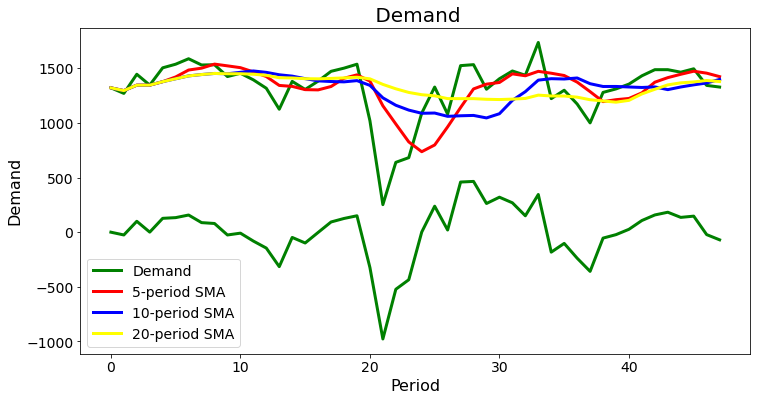

In [102]:
# colors for the line plot
colors = ['green', 'red', 'blue', 'yellow']
# line plot for demand
df1.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand', '5-period SMA', '10-period SMA', '20-period SMA'], fontsize=14)
# title and labels
plt.title(' Demand', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

#### In this graph, from following 3 periods there are Various fluctuations in Demand over given years


In [103]:
# For KPI Calculation

MAE = df1["Error_10"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df1["Error_10"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df1["Error_10"]**2).mean()
print("MSE:",round(MSE,2))


MAE: 174.95
RMSE: 250.35
MSE: 62672.98


#### Here we can see that the Mean Absolute error is 174.95, Route mean square error is 250.35 and Mean square error is 62672.98, RMSE is considered better while compare to other two metrics as RMSE emphasizes the most significant error

In [104]:
mae = metrics.mean_absolute_error(df1['Demand'], df1['SMA_10'])
mse = metrics.mean_squared_error(df1['Demand'], df1['SMA_10'])
rmse = np.sqrt(mse) # or mse**(0.5)  

In [105]:
print(round(mae,2))
print(round(mse,2))
print(round(rmse,2))

174.95
62672.98
250.35


# 2. EXPONENTIAL SMOOTHING

#### Simple Exponential Smoothing

####  For univariate data, It is a time series forcasting method, this model explicitly uses an exponentially decreasing weight for past data. It is used for manking future prediciton.Exponential smoothing is used when is the time series patern is not clear.

In [134]:
df= pd.read_csv('EIA_puerto_rico_electric_consumption.csv', parse_dates=True, index_col =0)

In [135]:
df.shape

(48, 6)

In [136]:
# //Renaming the new columns
df1 = df.rename(columns={'all_sectors': 'Demand'})

In [137]:
train=df1[0:-12] 
test=df1[-12:]
print(train.shape)
print(test.shape)

(36, 6)
(12, 6)


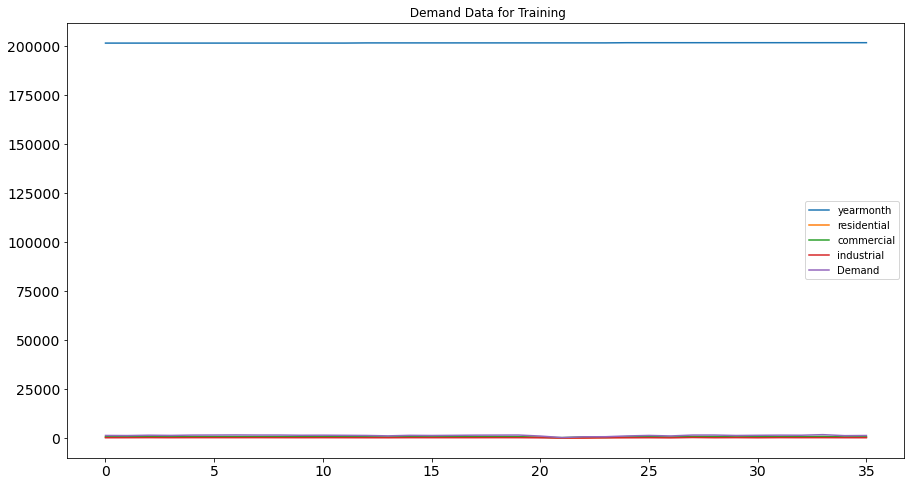

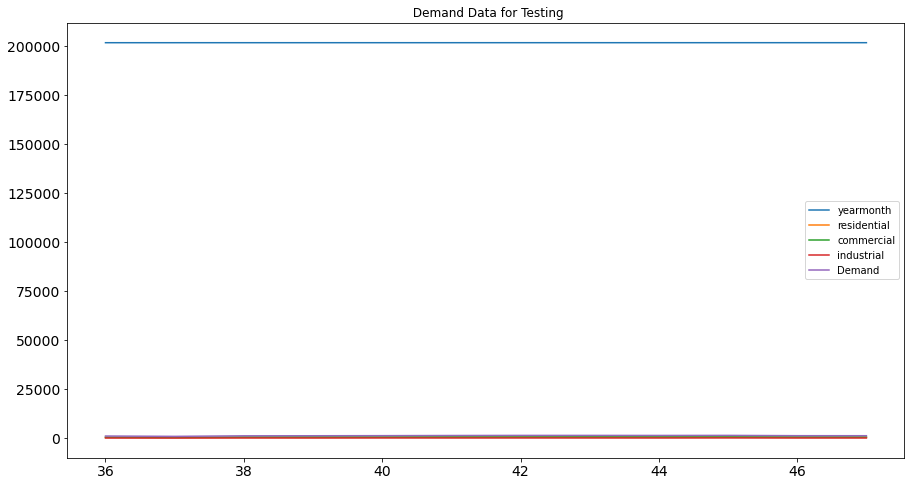

In [138]:
# Plotting train and test data
train.plot(figsize=(15,8), title= ' Demand Data for Training', fontsize=14)
test.plot(figsize=(15,8), title= ' Demand Data for Testing', fontsize=14)
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

### Simple Exponential Smoothing

MAE 119.85
MSE 21,868.43
RMSE 147.88


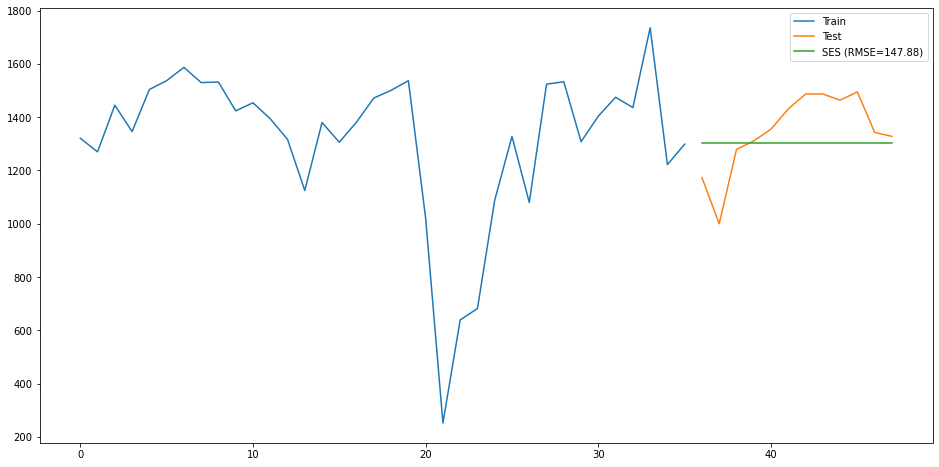

In [119]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.8,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.SES)
mse=mean_squared_error(test.Demand, pred.SES)
rmse = sqrt(mean_squared_error(test.Demand, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()

#### From the Simple Exponential Smoothing we got RMSE = 147.88

In [140]:
pred

,date,yearmonth,residential,commercial,industrial,Demand,Holt_Winter
36,2019-01-01,201901,447,573,154,1173,"1,487.61"
37,2019-02-01,201902,367,487,146,1000,"1,488.61"
38,2019-03-01,201903,448,650,180,1279,"1,555.29"
39,2019-04-01,201904,465,681,165,1311,"1,647.24"
40,2019-05-01,201905,512,655,189,1355,"1,733.79"
41,2019-06-01,201906,568,692,171,1431,"1,702.93"
42,2019-07-01,201907,618,687,181,1487,"1,763.72"
43,2019-08-01,201908,594,718,175,1487,"1,779.23"
44,2019-09-01,201909,586,712,166,1464,"1,594.86"
45,2019-10-01,201910,587,712,196,1495,"1,399.96"


### Double Exponential Smoothing (Holt)

#### Holt's two parameter model is also known as linear,double,trend-enhanced exponential smoothing model for forecasting data with trend. In this model we have three separate equations that work together to generate a final forecast. for level, trend and seasonal component with three parameters.

MAE 162.77
MSE 39,947.66
RMSE 199.87


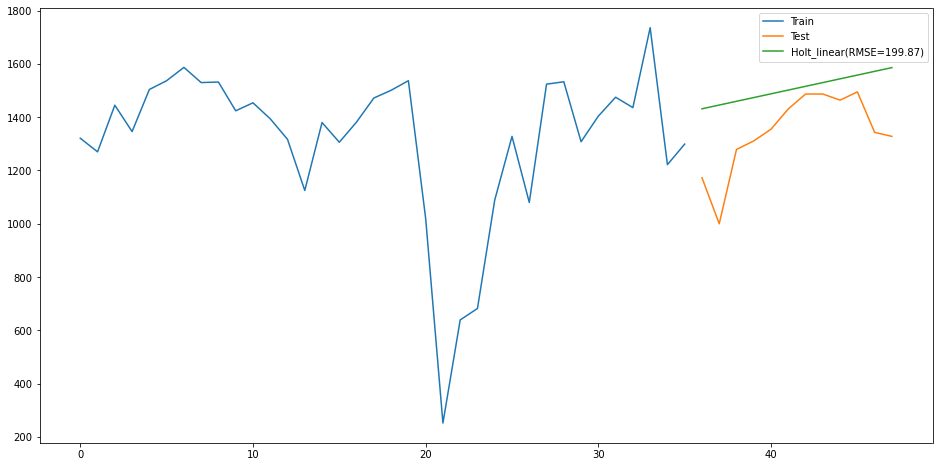

In [141]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.Demand, pred.Holt_linear)
mse=mean_squared_error(test.Demand, pred.Holt_linear)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

#### From the Double Exponential Smoothing we got RMSE = 199.87

In [142]:
pred

,date,yearmonth,residential,commercial,industrial,Demand,Holt_linear
36,2019-01-01,201901,447,573,154,1173,"1,431.57"
37,2019-02-01,201902,367,487,146,1000,"1,445.62"
38,2019-03-01,201903,448,650,180,1279,"1,459.67"
39,2019-04-01,201904,465,681,165,1311,"1,473.72"
40,2019-05-01,201905,512,655,189,1355,"1,487.78"
41,2019-06-01,201906,568,692,171,1431,"1,501.83"
42,2019-07-01,201907,618,687,181,1487,"1,515.88"
43,2019-08-01,201908,594,718,175,1487,"1,529.93"
44,2019-09-01,201909,586,712,166,1464,"1,543.99"
45,2019-10-01,201910,587,712,196,1495,"1,558.04"


### Triple Exponential Smoothing (Holt Winters)

#### Triple exponential smoothing acknowledge the seasonality in data with the seasonal factor gamma. In our data there is seasonality with trend which means we can not see any repetition in the data, so we have  used TES.

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

MAE 245.03
MSE 78,028.82
RMSE 279.34


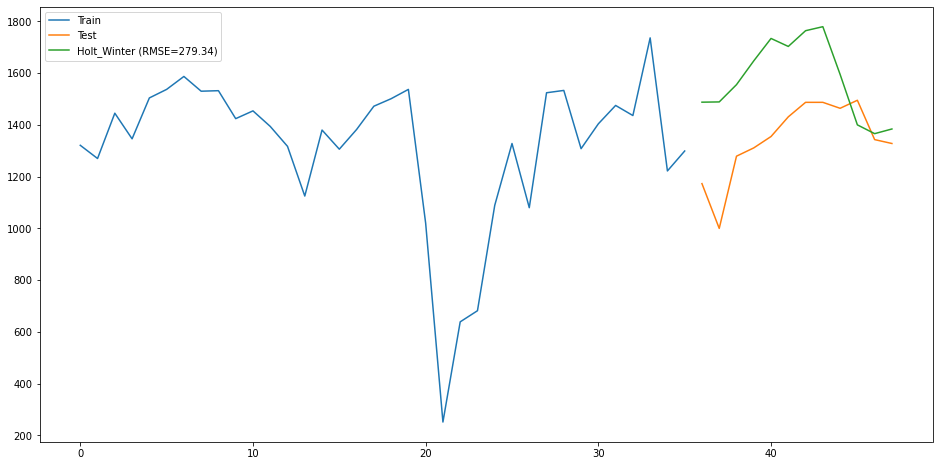

In [144]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Demand']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.Holt_Winter)
mse=mean_squared_error(test.Demand, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

In [145]:
pred

,date,yearmonth,residential,commercial,industrial,Demand,Holt_Winter
36,2019-01-01,201901,447,573,154,1173,"1,487.61"
37,2019-02-01,201902,367,487,146,1000,"1,488.61"
38,2019-03-01,201903,448,650,180,1279,"1,555.29"
39,2019-04-01,201904,465,681,165,1311,"1,647.24"
40,2019-05-01,201905,512,655,189,1355,"1,733.79"
41,2019-06-01,201906,568,692,171,1431,"1,702.93"
42,2019-07-01,201907,618,687,181,1487,"1,763.72"
43,2019-08-01,201908,594,718,175,1487,"1,779.23"
44,2019-09-01,201909,586,712,166,1464,"1,594.86"
45,2019-10-01,201910,587,712,196,1495,"1,399.96"


# 3. Linear Regression

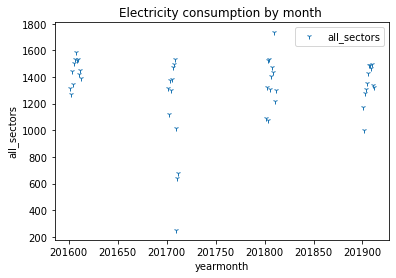

In [161]:
# Explore the data
df.plot(x='yearmonth', y='all_sectors', style='1')
plt.title('Electricity consumption by month ')  
plt.xlabel('yearmonth')  
plt.ylabel('all_sectors')  
plt.show()

In [162]:
X = df['yearmonth'].values.reshape(-1,1)
y = df['all_sectors'].values.reshape(-1,1)

In [163]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [166]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-35563.36151394]
[[0.18282557]]


In [167]:
# Predictions on the test data 
y_pred = regressor.predict(X_test)

In [168]:
# Comparison of Actual values with predicted ones
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1308,"1,331.94"
1,1504,"1,295.19"
2,1080,"1,331.39"
3,1404,"1,332.12"
4,1436,"1,332.48"
5,1000,"1,349.49"
6,1222,"1,332.85"
7,1355,"1,350.04"
8,1530,"1,295.74"
9,1454,"1,296.28"


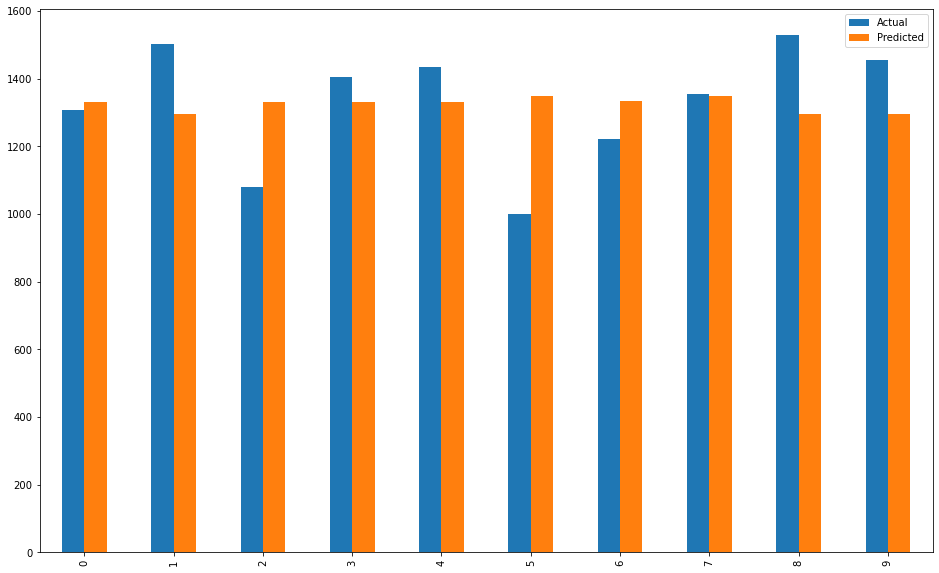

In [169]:
# Visualization of Comaprison result
df.plot(kind='bar',figsize=(16,10))
plt.show()

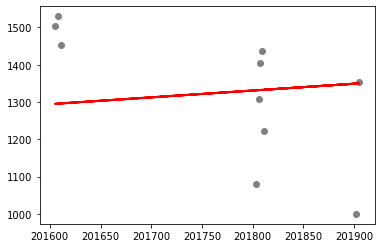

In [170]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [171]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 151.6813570687118
Mean Squared Error: 33746.05942038856
Root Mean Squared Error: 183.70100549640048


# 4. Arima Model

In [185]:
#load the data
df = pd.read_csv("EIA_puerto_rico_electric_consumption.csv", index_col ='date', parse_dates =True)

In [186]:
df1=df.rename(columns={'all_sectors':'Demand'})
df1.head()

,Unnamed: 0,yearmonth,residential,commercial,industrial,Demand
date,,,,,,
2016-01-01,0,201601,515,648,158,1321
2016-02-01,1,201602,447,647,176,1270
2016-03-01,2,201603,499,738,208,1445
2016-04-01,3,201604,506,665,176,1346
2016-05-01,4,201605,556,746,202,1504


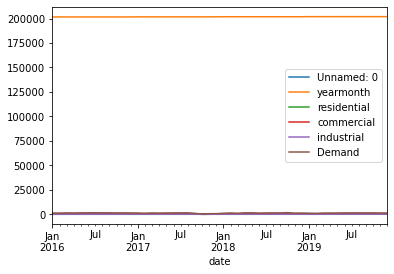

In [187]:
# viewing the dataset stored as df1
df1.plot()
plt.show()

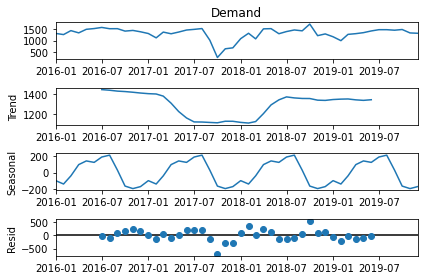

In [188]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df1['Demand'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

In [192]:
# ***Check for Stationarity***
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df1['Demand'])
# Print test statistic
print(result)

(-3.127607488323985, 0.024576432639606044, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 507.9179789147905)


ValueError: x is required to have ndim 1 but has ndim 2

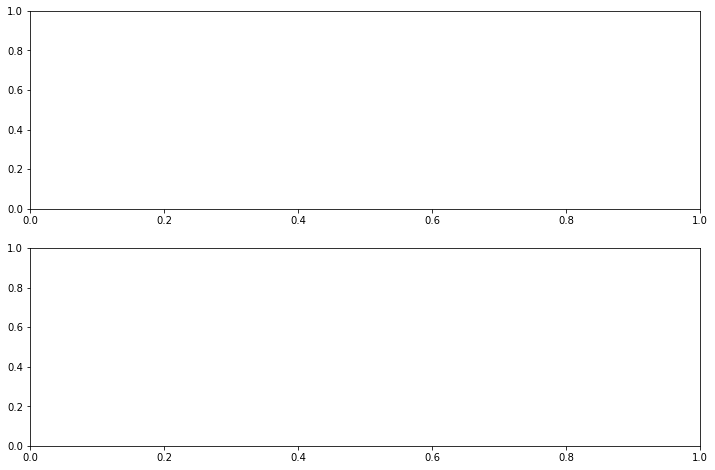

In [193]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df1, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df1, lags=15, zero=False, ax=ax2)

plt.show()

In [184]:
#Generating One Step Ahead Predictions in sample using values p= 1 and q=1
#Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df1, order=(2,1,2))
results = model.fit()
#Print fit summary
print(results.summary())

ValueError: SARIMAX models require univariate `endog`. Got shape (48, 6).

In [39]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

NameError: name 'results' is not defined

NameError: name 'mean_forecast' is not defined

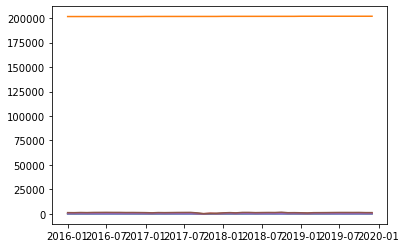

In [40]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
# ***Dynamic Predictions***
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

In [ ]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
# ***Out of the Sample Predictions***
forecast = results.get_forecast(steps =10)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)


In [ ]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
# ***Grid search method to calculate the parameter p and q***
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df1, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)


In [ ]:
# Construct DataFrame from order_aic_bic
order_df1 = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df1 in order of increasing AIC
print(order_df1.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df1.sort_values('BIC'))

In [ ]:
# ***Based on the results p=1 and q=1 and d=2*** 
# Instantiate the model
arma = SARIMAX(df1, order=(1,1,2))
results = arma.fit()
print(results.summary())


In [ ]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [ ]:
# ***Generate one step forecast***
# Generate predictions
one_step_forecast = results.get_prediction(start=-10)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

In [ ]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
# ***Generate Dynamic Predictions***
# Generate predictions
one_step_forecast = results.get_prediction(start=-10, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Temperature']
upper_limits = confidence_intervals.loc[:,'upper Temperature']

# Print best estimate predictions
print(mean_forecast)